In [510]:
# Import required dependencies, libraries and modules.
import warnings
warnings.filterwarnings('ignore')

In [511]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [512]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from imblearn.metrics import classification_report_imbalanced

In [513]:
import matplotlib.pyplot as plt
# from imblearn.ensemble import BalancedRandomForestClassifier

In [514]:
# Import 2018 stock data into a DataFrame
stocks_2018_df = pd.read_csv('Resources/2018_Financial_Data.csv')
stocks_2018_df

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [515]:
# Check that the first column (tickers) can be used as unique identifier
stocks_2018_df['Unnamed: 0'].nunique()

4392

In [516]:
# Rename first column in stocks_2018_df as "Ticker"
stocks_2018_df = stocks_2018_df.rename(columns={"Unnamed: 0":"Ticker"}).set_index("Ticker")
stocks_2018_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
Ticker,,,,,,,,,,,,,,,,,,,,,
CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0


In [517]:
# List of columns to keep from original dataset to keep
cols_to_keep = ["Sector","R&D Expenses","EPS","EBITDA","Net Profit Margin","Operating Cash Flow",
           "Free Cash Flow","priceEarningsRatio","grossProfitMargin","returnOnAssets","returnOnEquity",
           "inventoryTurnover","currentRatio","quickRatio","assetTurnover","debtEquityRatio","Working Capital","Class"]
len(cols_to_keep)

18

In [518]:
stocks_df = stocks_2018_df[cols_to_keep]
stocks_df

,Sector,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnAssets,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Working Capital,Class
Ticker,,,,,,,,,,,,,,,,,,
CMCSA,Consumer Cyclical,0.000000e+00,2.56,2.932900e+10,0.1241,2.429700e+10,1.198500e+10,13.3008,1.000000,0.3033,0.1638,0.0000,0.792000,0.540449,0.375499,1.5604,-5.755000e+09,1
KMI,Energy,0.000000e+00,0.66,6.410000e+09,0.1138,5.043000e+09,2.119000e+09,23.3030,0.484729,0.0446,0.0478,34.9666,0.757000,0.632261,0.179342,1.1083,-1.835000e+09,1
INTC,Technology,1.354300e+10,4.57,3.227600e+10,0.2972,2.943200e+10,1.425100e+10,10.2691,0.617336,0.3444,0.2824,9.9534,1.731000,1.105016,0.553660,0.3535,1.216100e+10,1
MU,Technology,2.141000e+09,12.27,1.940400e+10,0.4651,1.740000e+10,8.521000e+09,4.2999,0.588694,0.4163,0.4377,9.0476,2.787000,2.134168,0.700641,0.1436,1.028500e+10,1
GE,Industrials,0.000000e+00,-2.62,-8.489000e+09,-0.1838,4.246000e+09,7.090000e+08,0.0000,0.215056,NaN,-0.7216,7.3214,1.718208,1.402587,0.390955,3.3440,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRIV,Real Estate,0.000000e+00,-0.08,-3.757783e+06,0.0000,-6.299496e+06,-6.290432e+06,0.0000,NaN,NaN,-0.0800,0.0000,NaN,0.002142,0.000000,0.6850,NaN,0
YTEN,Basic Materials,4.759000e+06,-0.92,-8.974000e+06,-16.4928,-8.754000e+06,-8.796000e+06,0.0000,1.000000,-0.8423,-1.6093,0.0000,3.886000,3.815356,0.042901,1.1346,4.736000e+06,0
ZKIN,Basic Materials,1.652633e+06,0.52,1.006324e+07,0.1279,-2.234995e+06,-2.702133e+06,6.1538,0.333257,0.2228,0.1895,3.9427,1.644000,1.189722,0.718395,0.5202,2.521620e+07,0


In [519]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector               4392 non-null   object 
 1   R&D Expenses         4155 non-null   float64
 2   EPS                  4327 non-null   float64
 3   EBITDA               4209 non-null   float64
 4   Net Profit Margin    4216 non-null   float64
 5   Operating Cash Flow  4334 non-null   float64
 6   Free Cash Flow       4225 non-null   float64
 7   priceEarningsRatio   4140 non-null   float64
 8   grossProfitMargin    4045 non-null   float64
 9   returnOnAssets       3286 non-null   float64
 10  returnOnEquity       4136 non-null   float64
 11  inventoryTurnover    4153 non-null   float64
 12  currentRatio         4141 non-null   float64
 13  quickRatio           4143 non-null   float64
 14  assetTurnover        4162 non-null   float64
 15  debtEquityRatio      4141 non-null   fl

In [520]:
stocks_df.describe()

,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnAssets,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Working Capital,Class
count,4.155000e+03,4327.000000,4.209000e+03,4216.000000,4.334000e+03,4.225000e+03,4140.000000,4045.000000,3286.000000,4.136000e+03,4153.000000,4141.000000,4143.000000,4162.000000,4141.000000,3.289000e+03,4392.000000
mean,1.180176e+08,-69.937477,9.853868e+08,-4.820220,9.263815e+08,5.063973e+08,24.042168,0.495431,-0.002996,2.685090e+03,48.044948,4.271089,4.073948,0.675478,0.773634,7.820450e+09,0.693534
std,9.330891e+08,5718.694086,3.863663e+09,103.478216,1.020974e+10,3.049297e+09,105.518285,1.515114,6.690527,1.732375e+05,1494.046198,57.612570,70.098656,0.758350,13.318040,3.177981e+11,0.461078
min,-1.042000e+08,-359825.000000,-8.992000e+09,-5009.166700,-3.400000e+11,-6.227011e+10,0.000000,-87.093692,-193.679200,-3.477246e+04,0.000000,-1.203000,0.000000,-0.083376,-251.027000,-3.479000e+12,0.000000
25%,0.000000e+00,-0.390000,1.536000e+06,-0.027800,7.447862e+05,-1.085712e+07,0.000000,0.286457,-0.166175,-8.107500e-02,0.000000,0.871000,0.571537,0.126476,0.024000,9.005333e+06,0.000000
50%,0.000000e+00,0.690000,8.453200e+07,0.046150,6.589800e+07,2.472500e+07,10.761150,0.490746,0.043400,7.485000e-02,3.237400,1.662000,1.142864,0.477829,0.465000,9.620400e+07,1.000000
75%,1.450150e+07,2.310000,4.777620e+08,0.146500,3.748750e+08,2.098000e+08,20.462250,0.827075,0.179825,1.532250e-01,10.604000,3.016000,2.298005,0.948632,1.115700,4.123800e+08,1.000000
max,2.883700e+10,101641.000000,8.380600e+10,1056.465800,4.470000e+11,9.414620e+10,3842.000000,1.896479,203.455900,1.114114e+07,95827.710300,3192.192308,3180.813708,10.237198,637.229900,1.472140e+13,1.000000


In [521]:
stocks_df.isnull().sum()

Sector                    0
R&D Expenses            237
EPS                      65
EBITDA                  183
Net Profit Margin       176
Operating Cash Flow      58
Free Cash Flow          167
priceEarningsRatio      252
grossProfitMargin       347
returnOnAssets         1106
returnOnEquity          256
inventoryTurnover       239
currentRatio            251
quickRatio              249
assetTurnover           230
debtEquityRatio         251
Working Capital        1103
Class                     0
dtype: int64

In [522]:
test_df = stocks_df.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3092 entries, CMCSA to ZYME
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector               3092 non-null   object 
 1   R&D Expenses         3092 non-null   float64
 2   EPS                  3092 non-null   float64
 3   EBITDA               3092 non-null   float64
 4   Net Profit Margin    3092 non-null   float64
 5   Operating Cash Flow  3092 non-null   float64
 6   Free Cash Flow       3092 non-null   float64
 7   priceEarningsRatio   3092 non-null   float64
 8   grossProfitMargin    3092 non-null   float64
 9   returnOnAssets       3092 non-null   float64
 10  returnOnEquity       3092 non-null   float64
 11  inventoryTurnover    3092 non-null   float64
 12  currentRatio         3092 non-null   float64
 13  quickRatio           3092 non-null   float64
 14  assetTurnover        3092 non-null   float64
 15  debtEquityRatio      3092 non-null   fl

In [523]:
w_capital = stocks_2018_df["Total current assets"] / stocks_2018_df["Total current liabilities"]
w_capital.isnull().sum()

192

In [524]:
# Drop ROA and Working Capital? Add w_capital? Probably not much predictive value since we already have 
# Current Ratio = Current Assets / Current Liabilities

In [525]:
# Number of distinct sectors
stocks_df["Sector"].nunique()

11

In [526]:
# Check frequency in each category
stocks_df["Sector"].value_counts()

Financial Services        824
Healthcare                691
Technology                636
Industrials               574
Consumer Cyclical         506
Basic Materials           276
Real Estate               255
Energy                    248
Consumer Defensive        191
Utilities                 102
Communication Services     89
Name: Sector, dtype: int64

In [527]:
# not too many sectors, and no rare values, so no binning needed.

<AxesSubplot:>

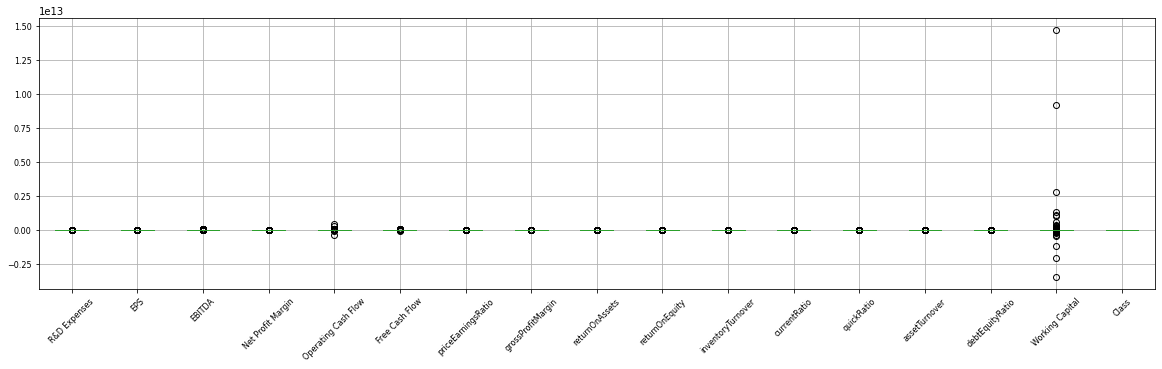

In [528]:
stocks_df.boxplot(rot=45, fontsize=8,figsize=(20,5))

In [529]:
values_list = ["Sector","R&D Expenses","EPS","EBITDA","Operating Cash Flow","Free Cash Flow","Working Capital"]
values = stocks_df[values_list]
values.head()

,Sector,R&D Expenses,EPS,EBITDA,Operating Cash Flow,Free Cash Flow,Working Capital
Ticker,,,,,,,
CMCSA,Consumer Cyclical,0.000000e+00,2.56,2.932900e+10,2.429700e+10,1.198500e+10,-5.755000e+09
KMI,Energy,0.000000e+00,0.66,6.410000e+09,5.043000e+09,2.119000e+09,-1.835000e+09
INTC,Technology,1.354300e+10,4.57,3.227600e+10,2.943200e+10,1.425100e+10,1.216100e+10
MU,Technology,2.141000e+09,12.27,1.940400e+10,1.740000e+10,8.521000e+09,1.028500e+10
GE,Industrials,0.000000e+00,-2.62,-8.489000e+09,4.246000e+09,7.090000e+08,NaN


In [530]:
ratios = stocks_df.drop(columns=values_list)
ratios.head()

,Net Profit Margin,priceEarningsRatio,grossProfitMargin,returnOnAssets,returnOnEquity,inventoryTurnover,currentRatio,quickRatio,assetTurnover,debtEquityRatio,Class
Ticker,,,,,,,,,,,
CMCSA,0.1241,13.3008,1.000000,0.3033,0.1638,0.0000,0.792000,0.540449,0.375499,1.5604,1
KMI,0.1138,23.3030,0.484729,0.0446,0.0478,34.9666,0.757000,0.632261,0.179342,1.1083,1
INTC,0.2972,10.2691,0.617336,0.3444,0.2824,9.9534,1.731000,1.105016,0.553660,0.3535,1
MU,0.4651,4.2999,0.588694,0.4163,0.4377,9.0476,2.787000,2.134168,0.700641,0.1436,1
GE,-0.1838,0.0000,0.215056,NaN,-0.7216,7.3214,1.718208,1.402587,0.390955,3.3440,1


<AxesSubplot:>

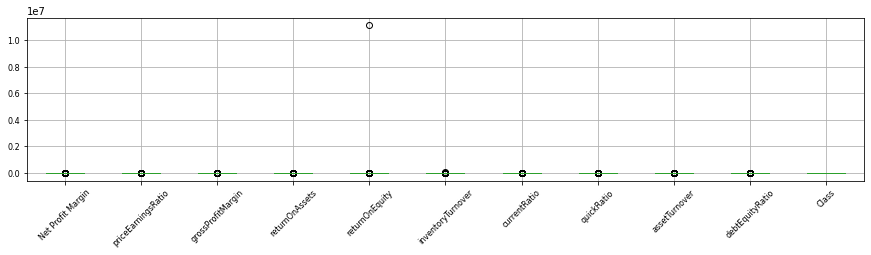

In [531]:
ratios.boxplot(rot=45, fontsize=8,figsize=(15,3))

<AxesSubplot:>

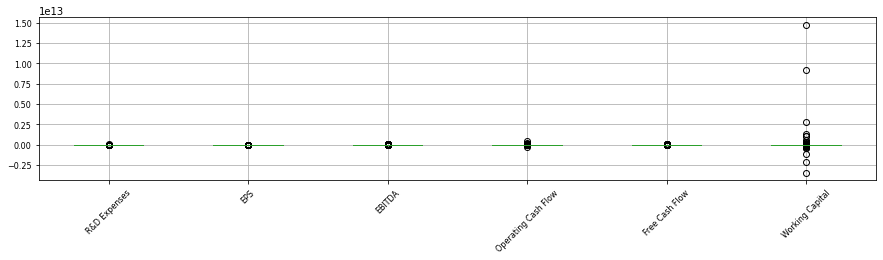

In [532]:
values.boxplot(rot=45, fontsize=8,figsize=(15,3))

<AxesSubplot:>

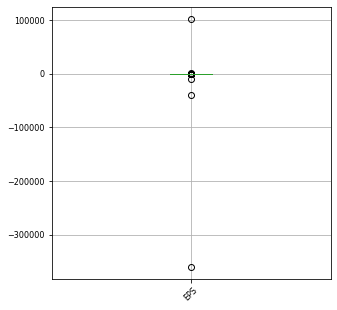

In [533]:
stocks_df.boxplot(column="EPS",rot=45, fontsize=8,figsize=(5,5))

<AxesSubplot:>

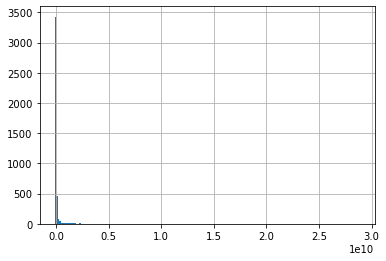

In [534]:
stocks_df["R&D Expenses"].hist(bins=200)

<AxesSubplot:xlabel='EBITDA', ylabel='R&D Expenses'>

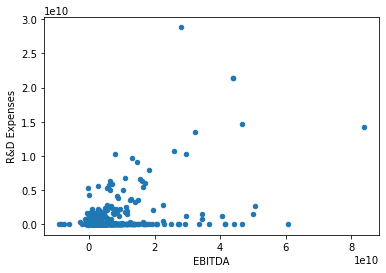

In [535]:
stocks_df.plot.scatter(x="EBITDA",y='R&D Expenses')

<AxesSubplot:>

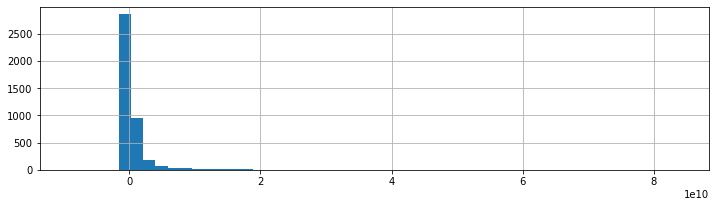

In [536]:
stocks_df["EBITDA"].hist(bins=50,figsize=(12,3))

In [537]:
# NOTE: continue using "test_df" which had all null values dropped

In [538]:
# Generate our categorical variable lists
test_cat = test_df.dtypes[test_df.dtypes == "object"].index.tolist()

In [548]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(test_df[test_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(test_cat)
encode_df.set_index(test_df.index)

,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
Ticker,,,,,,,,,,,
CMCSA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KMI,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
INTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
MU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AAPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
WVVI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XELB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YTEN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [550]:
# Merge one-hot encoded features and drop the originals
test2_df = test_df.merge(encode_df,left_index=True, right_index=True)
# test2_df = application_df.drop(application_cat,1)
test2_df.head()

,Sector,R&D Expenses,EPS,EBITDA,Net Profit Margin,Operating Cash Flow,Free Cash Flow,priceEarningsRatio,grossProfitMargin,returnOnAssets,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities


In [402]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_train' is not defined